In [1]:
# import library
import pandas as pd

In [61]:
#menampilkan beberapa baris pertama dari dataset 
data1 = pd.read_csv('R03_excercises.csv')
data1.head()

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3


In [29]:
data1

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3
...,...,...
69,3.6,1.8
70,1.8,0.7
71,1.9,0.8
72,3.4,1.7


In [62]:
# menghasilkan matriks korelasi untuk variabel dalam DataFrame
data1.corr()

,Daily Exercise Time (X),Weight Loss (Y)
Daily Exercise Time (X),1.000000,0.990064
Weight Loss (Y),0.990064,1.000000


In [37]:
# mengambil kolom 'Daily Exercise Time (X)' dan 'Weight Loss (Y)' dari DataFrame data1 dan mengonversinya ke dalam format array yang sesuai dengan kebutuhan algoritma pembelajaran mesin
import numpy as np
Daily_Exercise_Time = data1['Daily Exercise Time (X)'].values[:, np.newaxis]
Weight_Loss = data1['Weight Loss (Y)'].values 

In [63]:
# Mencetak variabel yang menampilkan nilai dari kolom tersebut dalam format array
print(Daily_Exercise_Time)

[[0.5]
 [1. ]
 [1.5]
 [2. ]
 [1. ]
 [2.5]
 [3. ]
 [2. ]
 [0.7]
 [3.5]
 [1.2]
 [2.8]
 [0.9]
 [3.2]
 [1.6]
 [0.4]
 [2.6]
 [1.1]
 [3.8]
 [2.5]
 [2. ]
 [1.3]
 [3.7]
 [1.4]
 [3.9]
 [2.3]
 [1.5]
 [2.9]
 [1. ]
 [0.6]
 [3. ]
 [2.7]
 [1.9]
 [1.8]
 [2.4]
 [0.8]
 [3.4]
 [2.1]
 [2.2]
 [1.2]
 [3.5]
 [3.1]
 [1.3]
 [3.6]
 [2.6]
 [2.7]
 [0.5]
 [3.9]
 [1.4]
 [0.7]
 [3.2]
 [2.8]
 [1.1]
 [3.3]
 [2. ]
 [0.9]
 [2.2]
 [2.5]
 [0.6]
 [3.7]
 [1.7]
 [1.5]
 [3.8]
 [2.4]
 [3. ]
 [0.8]
 [2.3]
 [2.9]
 [1.6]
 [3.6]
 [1.8]
 [1.9]
 [3.4]
 [1. ]]


## MODELLING

In [64]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model regresi linear
model1 = LinearRegression()
model1.fit(Daily_Exercise_Time,Weight_Loss)
LinearRegression()

LinearRegression()

## TESTING

In [65]:
# memprediksi berat badan berdasarkan nilai waktu latihan harian dan data uji terdiri dari dua entri waktu latihan harian, yaitu 3 jam dan 3.6 jam
Daily_Exercise_Time_test = [[3],[3.6]]
pred_weightloss = model1.predict(Daily_Exercise_Time_test)

print("Prediksi Weight loss: ", pred_weightloss)

Prediksi Weight loss:  [1.48359017 1.81401307]


In [ ]:
# Rumus Regresi -> y = ax + b (a = koefisien, b = intercept)
print("Koefisien: ", model1.coef_)
print("Intercept: ", model1.intercept_)

In [52]:
# Testing rumus
y = model1.coef_ * 10 + model1.intercept_
print(y)

[5.33852395]


## VISUALISASI

In [58]:
# Assuming 'Study Hours (X)' exists in data1
Daily_Exercise_Time = data1['Daily Exercise Time (X)'].values.reshape(-1, 1)
Prediksi_Weight_Loss = model1.predict(Daily_Exercise_Time)

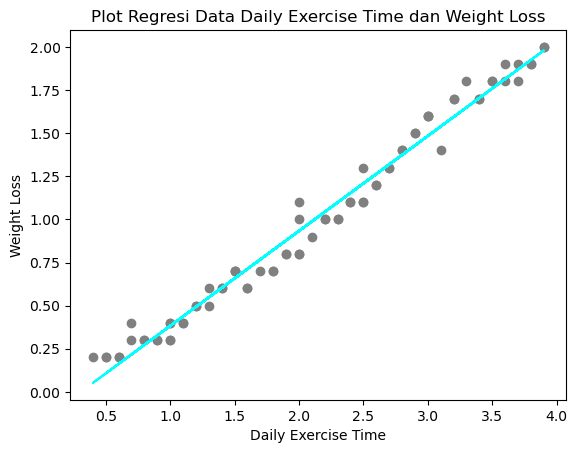

In [60]:
dataframe_baru = pd.DataFrame({'Daily Exercise Time (X)': data1['Daily Exercise Time (X)'], 'Weight Loss (Y)': prediksi_Weight_Loss})
plt.scatter(data1['Daily Exercise Time (X)'], data1['Weight Loss (Y)'], color='grey')
plt.plot(dataframe_baru['Daily Exercise Time (X)'], dataframe_baru['Weight Loss (Y)'], color='cyan')
plt.xlabel('Daily Exercise Time')
plt.ylabel('Weight Loss')
plt.title('Plot Regresi Data Daily Exercise Time dan Weight Loss')
plt.show()